In [21]:
import numpy as np
from scipy.spatial import cKDTree
import pyvista as pv
import matplotlib.pyplot as plt
import mayavi
import pandas as pd
import trimesh
import pymesh


In [59]:
# Load meshes (replace with your file paths)
mesh1 = pv.read("C:\\Users\\diton\\Desktop\\skull_cut.stl")
mesh2 = pv.read("C:\\Users\\diton\\Desktop\\skin_cut.stl")

# Create k-d tree for mesh1
tree = cKDTree(mesh1.points)

# List to store distances
distances = []

# Iterate through vertices of mesh2 and find closest points
for point in mesh2.points:
    _, idx = tree.query(point)
    closest_point = mesh1.points[idx]
    distance = np.linalg.norm(point - closest_point)
    distances.append(distance)

In [60]:
# Print minimum, maximum, and average distances
print(f"Minimum distance: {min(distances)}")
print(f"Maximum distance: {max(distances)}")
print(f"Average distance: {np.mean(distances)}")


Minimum distance: 1.7392804622650146
Maximum distance: 27.277362823486328
Average distance: 8.333407402038574
[11.285816, 11.319876, 11.577703, 11.553183, 11.69083, 11.803483, 12.018783, 12.015655, 12.222459, 12.015457]


In [61]:
interval_0_5 = []
interval_5_10 = []
interval_10_15 = []
interval_15_20 = []
interval_20_25 = []
interval_25_30 = []
interval_30_35 = []
interval_35_40 = []
interval_40m = []

for value in range(len(distances)):
    if 0 < value < 5:
        interval_0_5.append(value)
    elif 5 <= value < 10:
        interval_5_10.append(value)
    elif 10 <= value < 15:
        interval_10_15.append(value)
    elif 15 <= value < 20:
        interval_15_20.append(value)
    elif 20 <= value < 25:
        interval_20_25.append(value)
    elif 25 <= value < 30:
        interval_25_30.append(value)
    elif 30 <= value < 35:
        interval_30_35.append(value)
    elif 35 <= value < 40:
        interval_35_40.append(value)
    else:
        interval_40m.append(value)


In [65]:
print(f"Count: {len(interval_0_5)} Average distance: {np.mean(interval_0_5)}")
print(f"Count: {len(interval_5_10)}"), print(f"Average distance: {np.mean(interval_5_10)}")
print(f"Count: {len(interval_10_15)}"), print(f"Average distance: {np.mean(interval_10_15)}")
print(f"Count: {len(interval_15_20)}"), print(f"Average distance: {np.mean(interval_15_20)}")
print(f"Count: {len(interval_20_25)}"), print(f"Average distance: {np.mean(interval_20_25)}")
print(f"Count: {len(interval_25_30)}"), print(f"Average distance: {np.mean(interval_25_30)}")
print(f"Count: {len(interval_30_35)}"), print(f"Average distance: {np.mean(interval_30_35)}")
print(f"Count: {len(interval_35_40)}"), print(f"Average distance: {np.mean(interval_35_40)}")
print(f"Count: {len(interval_40m)}"), print(f"Average distance: {np.mean(interval_40m)}")

Count: 4 Average distance: 2.5
Count: 5
Average distance: 7.0
Count: 5
Average distance: 12.0
Count: 5
Average distance: 17.0
Count: 5
Average distance: 22.0
Count: 5
Average distance: 27.0
Count: 5
Average distance: 32.0
Count: 5
Average distance: 37.0
Count: 87964
Average distance: 44020.49955663681


(None, None)

(array([    0.,     0.,     0.,     0.,     0.,     0.,     0.,     0.,
            0.,     0.,     0.,     0.,     0.,     0.,     0., 35015.,
            0.,     0.,     0.,     0.,     0.,     0.,     0.,     0.,
            0.,     0.,     0.,     0.,     0.,     0.]),
 array([-0.5       , -0.46666667, -0.43333334, -0.40000001, -0.36666667,
        -0.33333334, -0.30000001, -0.26666668, -0.23333333, -0.2       ,
        -0.16666667, -0.13333334, -0.1       , -0.06666667, -0.03333334,
         0.        ,  0.03333334,  0.06666667,  0.1       ,  0.13333334,
         0.16666667,  0.2       ,  0.23333333,  0.26666668,  0.30000001,
         0.33333334,  0.36666667,  0.40000001,  0.43333334,  0.46666667,
         0.5       ]),
 <BarContainer object of 30 artists>)

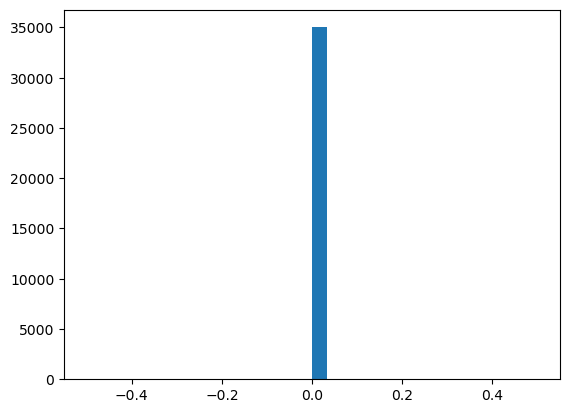

In [47]:
plt.hist(distances, bins=30)

In [25]:
distances_array = np.array(distances)
# points_with_distance = np.reshape(mesh1.points, (-1, 3))
points_with_distance = mesh1.points.copy()

print(points_with_distance.shape)
print(distances_array.shape)

(147722, 3)
(88003,)


In [26]:
# Assuming 'mesh1' has points and 'distances_array' holds calculated distances
filtered_points = []
filtered_distances = []

for i, distance in enumerate(distances_array):
  if not np.isnan(distance):  # Check if distance is not NaN
    filtered_points.append(mesh1.points[i])
    filtered_distances.append(distance)
      
filtered_points_array = np.array(filtered_points)
filtered_distances_array = np.array(filtered_distances)


In [27]:
# # Convert filtered points and distances to NumPy arrays
# filtered_points_array = [point[:3] for point in filtered_points]
# filtered_points_array = np.array(filtered_points)

selected_points = []
for point in filtered_points:
  selected_points.append([float(x) for x in point[:3]])  # Convert first 3 elements to floats
filtered_points_array = np.array(selected_points)

filtered_distances_array = np.array(filtered_distances)

# Checking where is the problem!!! But it's not clear....
print(filtered_points_array.shape)
print(filtered_distances_array.shape)
print(distances_array.shape)
print(distances_array.dtype)
print(filtered_points[:5])

(88003, 3)
(88003,)
(88003,)
float32
[pyvista_ndarray([ 12.181999, -55.791283, -31.22261 ], dtype=float32), pyvista_ndarray([ 12.07309 , -56.06076 , -31.318588], dtype=float32), pyvista_ndarray([ 12.107758, -55.95526 , -30.919739], dtype=float32), pyvista_ndarray([ 12.183731, -55.773193, -30.908478], dtype=float32), pyvista_ndarray([ 12.193764, -55.794403, -30.512009], dtype=float32)]


In [28]:
print(filtered_points_array.shape)
combined_array = np.hstack((filtered_points_array, distances_array[:, None]))
print(combined_array.shape)

(88003, 3)
(88003, 4)


In [29]:
# Assuming filtered_points_array is a pandas DataFrame with columns for x, y, z

# filtered_points_array = np.transpose(filtered_points_array)
points = pv.PolyData(np.transpose(filtered_points_array))
if len(distances_array) == len(points):  # Check for matching lengths
    points.point_arrays["distances"] = distances_array
# Assuming filtered_points_array is a pandas DataFrame with columns for x, y, z
# data = pd.DataFrame({"x": filtered_points_array[:, 0], "y": filtered_points_array[:, 1], "z": filtered_points_array[:, 2], "distances": distances_array})
# points = pv.PolyData(data)  # Create PolyData from DataFrame
plotter = pv.Plotter()
plotter.add_mesh(points, scalars = "distances", cmap = "plasma")  # "plasma" colormap
plotter.show()

ValueError: Points array must contain three values per point. Shape is (3, 88003) and should be (X, 3)

In [30]:
# Just checking. Not to the project
sample_points = np.array([[1, 2, 3], [4, 5, 6], [7, 8, 9]])  # Sample points
sample_distances = np.array([10, 20, 30])  # Sample distances

sliced_points_2 = sample_points[:, :3]  # Slice to get x, y, z
combined_array = np.hstack((sliced_points_2, sample_distances[:, None]))

print(combined_array.shape)
print(sliced_points_2.shape)

(3, 4)
(3, 3)


In [32]:
try:
  mesh1_colored = pv.PolyData(np.hstack((filtered_points_array, distances_array[:, None])))
except Exception as e:
  print(f"Error creating PolyData: {e}")

Error creating PolyData: Points array must contain three values per point. Shape is (88003, 4) and should be (X, 3)


In [33]:
mesh1_colored = pv.PolyData(np.hstack((filtered_points_array, distances_array[:, None])))

# Create a PolyData with the points and distances
mesh1_colored = pv.PolyData(points_with_distance)

# Color mapper for the distances
mapper = pv.UniformColorMapping(scalar_range = (min(distances), max(distances)))
mapper.auto_scalars = False  # Avoid automatic range scaling

# Apply the color mapper and scalar field to mesh1
mesh1_colored.scalars = distances_array
mesh1_colored.color(mapper) 

# Plot both meshes with different colors
plotter = pv.Plotter()
plotter.add_mesh(mesh1, color = 'white')  # Original mesh in white
plotter.add_mesh(mesh1_colored, cmap = mapper, show_scalar_bar = True, label = "Distance to mesh2")
plotter.show()

ValueError: Points array must contain three values per point. Shape is (88003, 4) and should be (X, 3)

In [36]:
# Second approach for calculating the mesh-to-mesh distances 

distances = []  # Store distances between each mesh1 vertex and mesh2

for point_id in range(len(mesh1.points)):
    # Get vertex and normal from mesh1
    vertex = mesh1.points[point_id]
    normal = mesh1.point_normals[point_id]

    # Create a ray starting at vertex, extending in negative normal direction
    ray_start = vertex
    ray_end = vertex - 0.1 * normal  # Adjust length as needed

    # Perform ray trace and check for intersection with mesh2
    # This returns a list of intersections (might have multiple)
    intersections = mesh2.ray_trace(ray_start, ray_end)

    # Find the first intersection point (modify for multiple intersections)
    if len(intersections) > 0:
        intersection = intersections[0]  # Assuming the first intersection is relevant
        distance = np.linalg.norm(vertex - intersection)
        distances.append(distance)


KeyboardInterrupt: 

In [ ]:
# Print minimum, maximum, and average distances from the second approach
print(f"Minimum distance: {min(distances)}")
print(f"Maximum distance: {max(distances)}")
print(f"Average distance: {np.mean(distances)}")

In [ ]:
plt.hist(distances, bins=30)